In [31]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Supermarket.csv')

# PROBLEM
#### kadang kala franchise supermarket tidak memiliki keuntungan dan standar service yang sama. Persaingan antar supermarket pun semakin kompetitif. Saya mendefine bawah:
- Bagaimana perbandingan pengunjung yang melakukan transaksi?
- Cabang mana yang lebih baik dan buruk sehingga kita bisa meningkatkan service tiap cabang?
- Bagaimana performa penjualan?
# GOALS
- Dapat mengambil keputusan berdasarkan EDA
- Mengetahui performa tiap cabang supermarket

#### 

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### karena barang yang dijual hanya berdasarkan product line saya mengabaikan tax 5%, Unit Price, dan total. saya juga fokus pada service dan keuntungkan

In [4]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
print('Jumlah data dan kolom adalah:', df.shape)

Jumlah data dan kolom adalah: (1000, 17)


In [6]:
data_detail = []

for i in df.columns:
    data_detail.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique(),
        df[i].sample(2).values
    ])

pd.DataFrame(data_detail, columns=[
    'Data Features(Col)',
    'Data Types',
    'Null Total',
    'Null Percentage %',
    'Number of Uniqueness',
    'Unique Sample'
])

,Data Features(Col),Data Types,Null Total,Null Percentage %,Number of Uniqueness,Unique Sample
0,Invoice ID,object,0,0.0,1000,"[670-79-6321, 237-44-6163]"
1,Branch,object,0,0.0,3,"[B, A]"
2,City,object,0,0.0,3,"[Mandalay, Mandalay]"
3,Customer type,object,0,0.0,2,"[Member, Normal]"
4,Gender,object,0,0.0,2,"[Male, Male]"
5,Product line,object,0,0.0,6,"[Food and beverages, Home and lifestyle]"
6,Unit price,float64,0,0.0,943,"[94.88, 53.3]"
7,Quantity,int64,0,0.0,10,"[3, 4]"
8,Tax 5%,float64,0,0.0,990,"[15.9275, 3.7485]"
9,Total,float64,0,0.0,990,"[737.7615, 339.36]"


- tidak ada data null, sehingga tidak perlu dilakukan hal apa-apa lagi
- jumlah invoice ada 1000 sehingga banyaknya dengan customer sama dengan invoce
- date masih object

mengubah data tanggal dan ekstraksi

In [7]:
df['date'] = pd.to_datetime(df['Date'])
purchase_dt=df['date'].dt

In [8]:
df['year_month'] = purchase_dt.to_period('M')
df['day'] = purchase_dt.day
df['month'] = purchase_dt.month
df['month_name'] = purchase_dt.month_name()
df['day_week'] = purchase_dt.dayofweek
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,date,year_month,day,month,month_name,day_week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,2019-01,5,1,January,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,2019-03,8,3,March,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,2019-03,3,3,March,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,2019-01,27,1,January,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,2019-02,8,2,February,4


In [10]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour  

In [12]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [13]:
df['Hour'].nunique()

11

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [17]:
df.head(1) 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,date,year_month,day,month,month_name,day_week,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,2019-01-05,2019-01,5,1,January,5,13


In [24]:
print('jumlah branch(cabang)',df['Branch'].nunique())
print('jumlah kota',df['City'].nunique())
print('jumlah product line',df['Product line'].nunique())
print('jumlah jenis payment',df['Payment'].nunique())

jumlah branch(cabang) 3
jumlah kota 3
jumlah product line 6
jumlah jenis payment 3


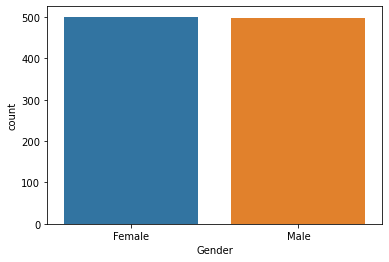

Female 501
Male 499


In [46]:
sns.countplot(df['Gender'])
plt.show()
A,B=df.Gender.value_counts()
print ('Female',A)
print ('Male',B)

hanya berbeda tipis yaitu 1 sample

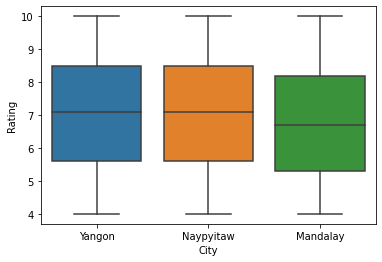

In [54]:
sns.boxplot(x="City", y = "Rating" ,data =df)
plt.show()

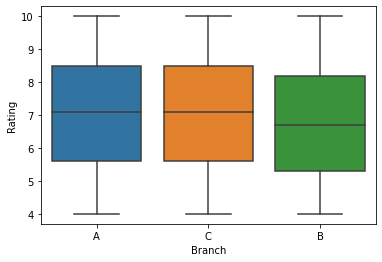

In [40]:
sns.boxplot(x="Branch", y = "Rating" ,data =df)
plt.show()

dengan asumsi 1 kota 1 cabang. tidak ada outlier untuk rating karena rangenya dari 1-10

In [56]:
df[['Branch','Rating']].groupby(['Branch']).agg(['max','min','mean'])

Rating               
          max  min      mean
Branch                      
A        10.0  4.0  7.027059
B        10.0  4.0  6.818072
C        10.0  4.0  7.072866

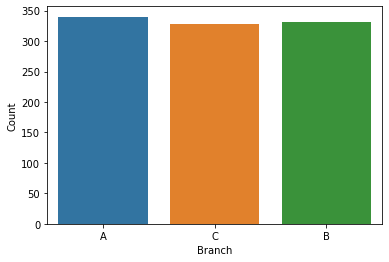

In [58]:
sns.countplot(df['Branch'])
plt.ylabel('Count')
plt.show()

In [57]:
df[['Branch','Invoice ID']].groupby(['Branch']).agg(['count'])

,Invoice ID
,count
Branch,
A,340
B,332
C,328


#### Kesimpulan sampai sini
- dengan perbedaan 2 sampel saja dari 100 kita sulit mencari kesimpulan jika hanya berdasarkan gender
- Cabang dengan rata-rata rating paling rendah adalah cabang B, sehingga perlu ditingkatkan lagi peforma dari pelayanannya
- Namun cabang yang paling sepi pengunjung adalah cabang C, cabang perlu mencari cara untuk meningkatkan pengunjung

In [78]:
df_hour=df[['Invoice ID','Hour']].groupby(['Hour']).agg(Count_Invoice=('Invoice ID', 'count'))
df_hour.reset_index()

,Hour,Count_Invoice
0,10,101
1,11,90
2,12,89
3,13,103
4,14,83
5,15,102
6,16,77
7,17,74
8,18,93
9,19,113


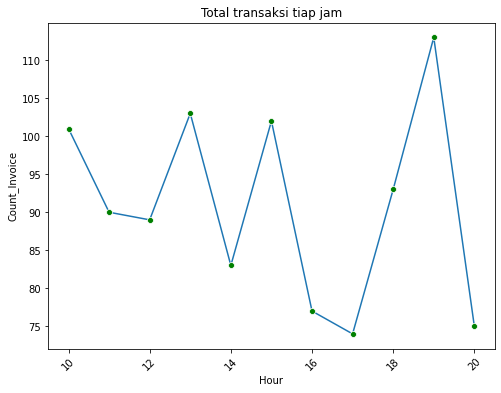

In [79]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Hour', y='Count_Invoice', data=df_hour, markerfacecolor='g', marker='o')
plt.xticks(rotation=45)
plt.title('Total transaksi tiap jam')
plt.show()

#### Jam sibuk terjadi pada pukul 19
- kerena data sampel terdiri dari 3 bulan makan saya tidak mencari analis berdasarkan bulan

In [136]:
df[['Quantity','Product line']].groupby(['Product line']).agg(['sum'])

,Quantity
,sum
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


In [95]:
df[['Invoice ID','Product line','Gender']].groupby(['Gender','Product line']).agg(['count'])

Invoice ID
                                   count
Gender Product line                     
Female Electronic accessories         84
       Fashion accessories            96
       Food and beverages             90
       Health and beauty              64
       Home and lifestyle             79
       Sports and travel              88
Male   Electronic accessories         86
       Fashion accessories            82
       Food and beverages             84
       Health and beauty              88
       Home and lifestyle             81
       Sports and travel              78

setelah dipastikan lagi memang aga sulit jika kita mengambil insight dari gender karena keterbatasan sample dan timpangnya interest female di product line Health and beauty

In [106]:
df[['Invoice ID','Product line','Branch']].groupby(['Branch','Product line']).agg(['count'])

Invoice ID
                                   count
Branch Product line                     
A      Electronic accessories         60
       Fashion accessories            51
       Food and beverages             58
       Health and beauty              47
       Home and lifestyle             65
       Sports and travel              59
B      Electronic accessories         55
       Fashion accessories            62
       Food and beverages             50
       Health and beauty              53
       Home and lifestyle             50
       Sports and travel              62
C      Electronic accessories         55
       Fashion accessories            65
       Food and beverages             66
       Health and beauty              52
       Home and lifestyle             45
       Sports and travel              45

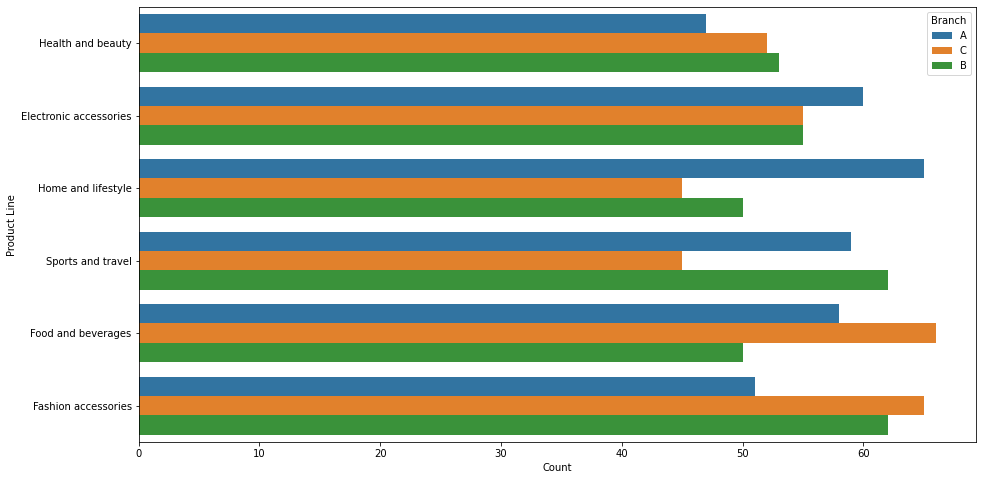

In [102]:
plt.figure(figsize=(15, 8))
sns.countplot(y ='Product line', hue = "Branch", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show()

- untuk branch A Product line yang paling laris adalah Electronic accessories sedangkan untuk yang perlu ditingkatkan adalah Health and beauty
- untuk branch B Product line yang paling laris adalah Sports and travel dan Fashion accessories sedangkan untuk yang perlu ditingkatkan adalah Home and lifestyle	
- untuk branch C Product line yang paling laris adalah Food and beverages sedangkan yang perlu ditingkatkan adalah Home and lifestyle dan Sports and travel	

In [109]:
df[['Invoice ID','Payment','Branch']].groupby(['Branch','Payment']).agg(['count'])

Invoice ID
                        count
Branch Payment               
A      Cash               110
       Credit card        104
       Ewallet            126
B      Cash               110
       Credit card        109
       Ewallet            113
C      Cash               124
       Credit card         98
       Ewallet            106

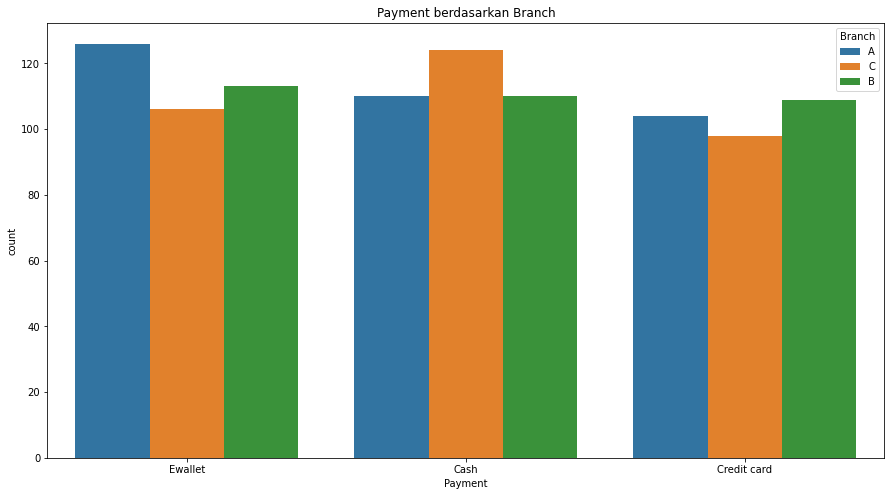

In [112]:
plt.figure(figsize=(15, 8))
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment berdasarkan Branch")
plt.show()

Pembayaran menggunakan Credit card paling jarang sedangkan.

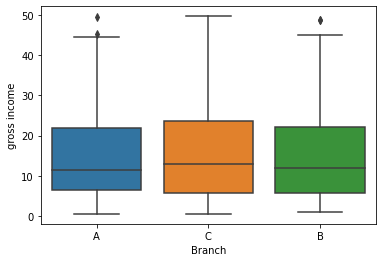

In [115]:
sns.boxplot(x="Branch", y = "gross income" ,data =df)
plt.show()

terdapat outlier pada gross income namun saya abaikan karena jumlah sampel yang sedikit dan outlier yang sedikit.
outlier tersebut memang data penjualan maka bisa kita abaikan juga (tidak perlu di handling)

In [129]:
gross=df[['gross income','day']].groupby(['day']).agg(keuntungan=('gross income', 'mean')).reset_index()
gross

,day,keuntungan
0,1,16.707625
1,2,15.055663
2,3,16.401097
3,4,13.066707
4,5,14.864915
5,6,13.870455
6,7,14.411921
7,8,15.683829
8,9,17.718514
9,10,14.680359


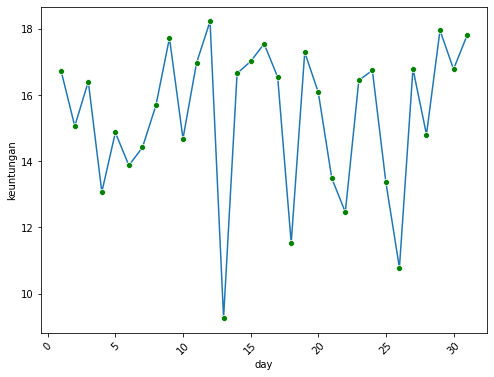

In [130]:
plt.figure(figsize=(8,6))
sns.lineplot(x='day', y='keuntungan', data=gross, markerfacecolor='g', marker='o')
plt.xticks(rotation=45)
plt.show()

In [132]:
pengunjung=df[['Invoice ID','day']].groupby(['day']).agg(pengunjung=('Invoice ID', 'count')).reset_index()
pengunjung

,day,pengunjung
0,1,28
1,2,40
2,3,36
3,4,29
4,5,41
5,6,33
6,7,38
7,8,41
8,9,37
9,10,32


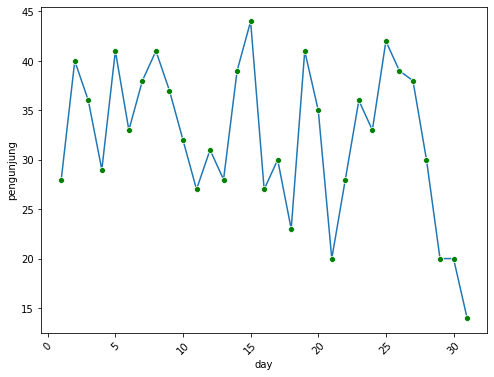

In [133]:
plt.figure(figsize=(8,6))
sns.lineplot(x='day', y='pengunjung', data=pengunjung, markerfacecolor='g', marker='o')
plt.xticks(rotation=45)
plt.show()

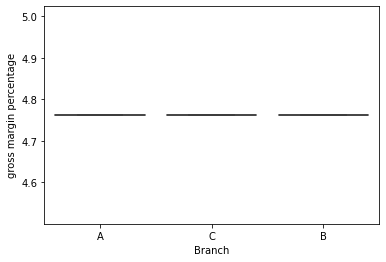

In [134]:
sns.boxplot(x="Branch", y = "gross margin percentage" ,data =df)
plt.show()

- rata-rata income tiap harinya amat fluktuatif begitu pula jumlah harian pengunjung
- gross margin percentage sama rata

# KESIMPULAN
- minimnya jumlah data sample
- Tiap kota memiliki satu cabang. Cabang dengan Rating paling rendah adalah cabang B
- Cabang paling sibuk pengunjung adalah cabang A dan yang paling sepi cabang C
- Supermarket paling sibuk pada pukul 7 malam
- Tiap cabang memiliki product line unggulan masing-masing
- Rata-rata gross income paling tinggi adalah cabang C
- Payment menggunakan e-wallet paling digemari
- Keuntungan tiap harinya amat fluktuatif begitu pula jumlah pengunjung

# SARAN
- Meskupun cabang C sepi pengunjung namun memiliki gross income paling tinggi. 
- untuk cabang C, Supermarket dapat menaikan service dari segi payment, Product line yang masih memiliki penjualan paling sedikit yaitu Home and lifestyle dan Sports and travel sehingga dapat dikombinasikan dengan promo khusus (ex: beli product Sports and travel dengan pembayaran cash mendapatkan diskon)
- menambahkan jumlah kasir atau pekerja di shift pukul 7 malam
- meninggkatkan service di cabang B yang ratingnya paling rendah dan fokus pada barang yang meberikan rating rendah
- supermarket harus berani menentukan gross margin percentage yang beragam. Ini berfungsi juga untuk menaikan gross income dan menutup kerugian dari barang yang perlu didiskon 

In [135]:
df[['Quantity','Product line']].groupby(['Product line']).agg(['sum'])

,Quantity
,sum
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920
